<a href="https://colab.research.google.com/github/ganesaperumal03/Air-Quality-Assessment-of-TamilNadu/blob/main/DAC_Phase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading data**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('/content/Air_quality.csv')
data.head(5)

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [ ]:
data.describe()

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
count,2879.000000,2868.000000,2866.000000,2875.000000,0.0
mean,475.750261,11.503138,22.136776,62.494261,NaN
std,277.675577,5.051702,7.128694,31.368745,NaN
min,38.000000,2.000000,5.000000,12.000000,NaN
25%,238.000000,8.000000,17.000000,41.000000,NaN
50%,366.000000,12.000000,22.000000,55.000000,NaN
75%,764.000000,15.000000,25.000000,78.000000,NaN
max,773.000000,49.000000,71.000000,269.000000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2868 non-null   float64
 8   NO2                             2866 non-null   float64
 9   RSPM/PM10                       2875 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 247.5+ KB


In [ ]:
data.isna().sum()

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2879
dtype: int64

In [ ]:
mean_so2 = data['SO2'].mean()
data['SO2'] = data['SO2'].fillna(mean_so2)

mean_no2 = data['NO2'].mean()
data['NO2'] = data['NO2'].fillna(mean_no2)

mean_rspm = data['RSPM/PM10'].mean()
data['RSPM/PM10'] = data['RSPM/PM10'].fillna(mean_rspm)

In [ ]:
data.drop('PM 2.5',axis=1,inplace=True)

In [ ]:
data.isna().sum()

Stn Code                          0
Sampling Date                     0
State                             0
City/Town/Village/Area            0
Location of Monitoring Station    0
Agency                            0
Type of Location                  0
SO2                               0
NO2                               0
RSPM/PM10                         0
dtype: int64

**Converting the date column to date format from object**

In [ ]:
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])

<ipython-input-10-d5a59ab410a6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Sampling Date'] = pd.to_datetime(data['Sampling Date'])


In [ ]:
data['Sampling Date'].dtype

dtype('<M8[ns]')

**Phase 4**
**Model  Building**

**Feature Selection**

<ipython-input-12-751c327365fa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='YlGnBu')


<Axes: >

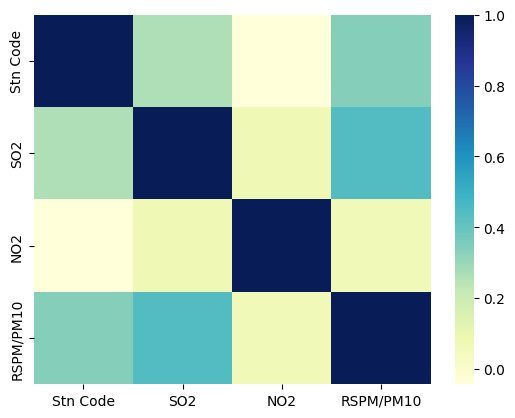

In [ ]:
import seaborn as sns

sns.heatmap(data.corr(),cmap='YlGnBu')

In [ ]:
!pip install tensorflow

In [ ]:
data.columns

Index(['Stn Code', 'Sampling Date', 'State', 'City/Town/Village/Area',
       'Location of Monitoring Station', 'Agency', 'Type of Location', 'SO2',
       'NO2', 'RSPM/PM10'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
X = data[['SO2', 'NO2', 'RSPM/PM10']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

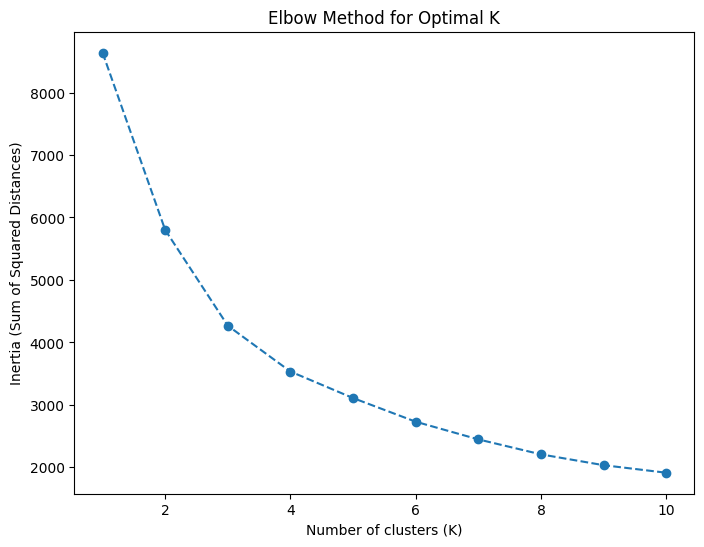

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
data['Air Quality'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data['Air Quality']

0       1
1       1
2       1
3       1
4       1
       ..
2874    0
2875    1
2876    0
2877    0
2878    0
Name: Air Quality, Length: 2879, dtype: int32

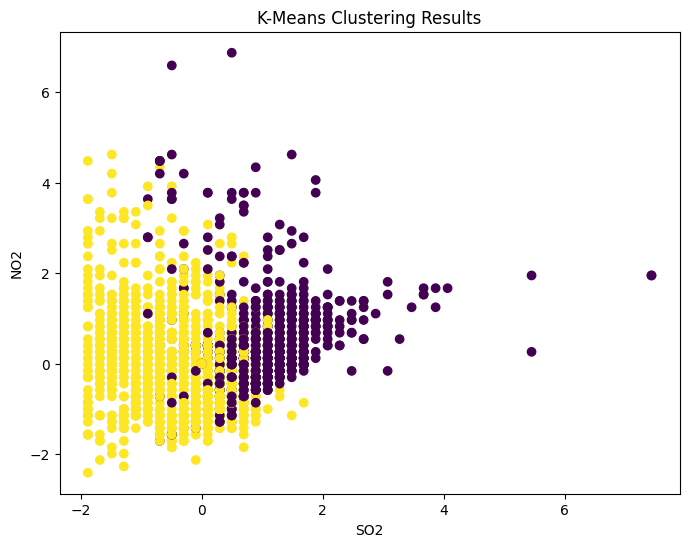

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=data['Air Quality'], cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('SO2')
plt.ylabel('NO2')
plt.show()


In [ ]:
new_data = pd.DataFrame({'SO2': [12.0,13.0,15.0], 'NO2': [16.0,17.0,20.0], 'RSPM/PM10': [45.0,50.0,55.0]})
predicted_air_quality = kmeans.fit_predict(new_data)
print(predicted_air_quality)

[0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd

data.to_csv('Air_Quality.csv',index=True)